<a href="https://colab.research.google.com/github/JayeshDabholkar/Yulu_Case_study/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

##Business Problem
Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands.

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-dark')


<ipython-input-1-3d86495b5c30>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [ ]:
data = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089'

In [ ]:
df =  pd.read_csv(data)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
# converting datetime from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# Checking missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Checking duplicate values
df.duplicated().sum()

0

In [ ]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


##Observation
Season, holiday, working day, and weather are categorical/discrete variables, while the others are continuous variables.

In [ ]:
# Descriptive Statistics
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##Observations
1. 50% of the data has been recorded in the fall season, while 75% of the data has been recorded in the winter. Very few data points are recorded in the summer.
2. For the holiday feature, very few data points are collected for the holiday.
3. 50% of the data for the working day has been recorded, otherwise
4. 75% of the data has been recorded during the cloudy season, while 50% is collected for a few clouds/clear.
5. The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded at 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius.
6. The median feeling temperature is 24.24 degrees Celsius, while 75% of the data has been recorded at 31.06 degrees Celsius. The average body temperature is noted as 23.65 degrees Celsius.
7. The median humidity is noted as 62, while 75% of the data has been recorded at 77. The average humidity is recorded at 61.86.
8. The median wind speed is noted as 12.998, while 75% of the wind speed is noted as 16.997. The average wind speed is noted as 12.79. The maximum humidity is 100.
9. The median causal users of the Yulu is 17, while 75% of the users are 49. The average #casual user is 36.02. The maximum number of causal users is 367.
10. The median number of registered users for the Yulu is 118, while 75% of the users are 222. The average number of registered users is 155.552. The maximum number of registered users is 886.
11. The median number of counted (casual + registered) users for the Yulu is 145, while 75% of the users are 284. The average number of counted users is 191.574. The maximum number of counted users is 977.

In [ ]:
df['season'].value_counts(normalize=True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

In [ ]:
df['holiday'].value_counts(normalize=True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

In [ ]:
df['workingday'].value_counts(normalize=True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

In [ ]:
df['weather'].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

Based on above results we can conclude that
1. The datapoints collected for all the seasons are roughly equal in proportion.
2. The majority of the data is collected for non-holidays, which makes sense as a lot of people on holiday might be using the service.
3. 68% of the data points are collected for the working day, which makes sense as a lot of people use public transportation on working days.
4. clear skies,Partly cloudy collects 66% of the data points, while mist or cloudy collects 26% of the data points.
5. Very few data points are collected during light snow or light rain conditions; probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.

In [ ]:
df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [ ]:
df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [ ]:
df['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [ ]:
df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [ ]:
df['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [ ]:
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [ ]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
df.groupby(by='season')['holiday'].sum().sort_values(ascending=False)

season
3    96
4    96
1    71
2    48
Name: holiday, dtype: int64

In [ ]:
df.groupby(by='season')['workingday'].sum().sort_values(ascending=False)

season
2    1893
4    1846
3    1845
1    1828
Name: workingday, dtype: int64

In [ ]:
df.groupby(by='season')['temp'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,12.530491,5.186492,0.82,9.02,12.30,16.40,29.52
2,2733.0,22.823483,5.159616,9.84,18.86,22.96,26.24,38.54
3,2733.0,28.789111,3.898157,15.58,26.24,28.70,31.16,41.00
4,2734.0,16.649239,4.742176,5.74,13.12,16.40,20.50,30.34


In [ ]:
df.groupby(by='season')['atemp'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,15.228956,6.092218,0.760,10.605,14.395,20.455,32.575
2,2733.0,26.647098,5.491321,11.365,22.725,26.515,31.060,43.940
3,2733.0,32.540783,4.594888,12.120,30.305,33.335,35.605,45.455
4,2734.0,20.059909,5.264197,7.575,15.910,20.455,24.240,34.090


In [ ]:
df.groupby(by='season')['humidity'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,56.297841,20.158420,0.0,41.0,53.0,70.0,100.0
2,2733.0,60.852909,20.179655,16.0,45.0,61.0,78.0,100.0
3,2733.0,64.123674,17.217859,17.0,51.0,66.0,78.0,100.0
4,2734.0,66.173738,17.813446,16.0,52.0,66.0,81.0,100.0


In [ ]:
df.groupby(by='season')['windspeed'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,14.636978,9.150257,0.0,7.0015,12.9980,19.9995,51.9987
2,2733.0,13.405607,7.992956,0.0,7.0015,12.9980,19.0012,47.9988
3,2733.0,11.508862,7.160605,0.0,7.0015,11.0014,15.0013,56.9969
4,2734.0,11.678147,7.842632,0.0,7.0015,11.0014,16.9979,43.0006


In [ ]:
df.groupby(by='season')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,100.853686,108.082025,0.0,22.0,69.0,141.00,681.0
2,2733.0,167.804610,156.156658,0.0,39.0,133.0,243.00,782.0
3,2733.0,182.196853,164.386982,0.0,53.0,151.0,252.00,886.0
4,2734.0,170.407462,154.828357,1.0,46.0,139.0,238.75,857.0


In [ ]:
df.groupby(by='season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
df.groupby(by='weather')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,164.928115,155.294051,0.0,41.0,130.0,236.0,886.0
2,2834.0,148.170078,144.765721,0.0,35.0,112.0,211.0,788.0
3,859.0,101.403958,119.344152,0.0,21.5,64.0,134.0,791.0
4,1.0,158.000000,NaN,158.0,158.0,158.0,158.0,158.0


In [ ]:
df.groupby(by='weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
df_copy = df.copy()
# extracting year from datetime
df_copy['year'] = df['datetime'].dt.year
# extracting month from datetime
df_copy['month'] = df['datetime'].dt.month
# extracting day from datetime
df_copy['day'] = df['datetime'].dt.day
# extracting day from datetime
df_copy['hour'] = df['datetime'].dt.hour

In [ ]:
df_copy.groupby(by='year')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,5422.0,144.223349,133.312123,1.0,32.0,111.0,210.0,638.0
2012,5464.0,238.560944,208.114003,1.0,59.0,199.0,354.0,977.0


In [ ]:
df_copy.groupby(by='month')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,884.0,90.366516,95.302518,1.0,20.00,65.0,123.00,512.0
2,901.0,110.003330,109.802322,1.0,26.00,78.0,157.00,539.0
3,901.0,148.169811,155.352814,1.0,26.00,100.0,219.00,801.0
4,909.0,184.160616,182.417619,1.0,35.00,133.0,277.00,822.0
5,912.0,219.459430,189.320173,1.0,56.00,182.0,323.50,873.0
6,912.0,242.031798,199.628690,1.0,73.75,206.0,363.00,869.0
7,912.0,235.325658,184.857337,1.0,77.25,209.5,358.50,872.0
8,912.0,234.118421,197.198461,1.0,67.75,193.0,337.25,897.0
9,909.0,233.805281,208.915910,1.0,58.00,188.0,349.00,977.0


In [ ]:
df_copy.groupby(by='year')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,5422.0,115.485430,108.847868,0.0,27.0,91.0,168.0,567.0
2012,5464.0,195.310944,174.709050,1.0,51.0,161.0,281.0,886.0


In [ ]:
df_copy.groupby(by='month')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,884.0,82.162896,87.279160,0.0,19.00,57.5,113.25,497.0
2,901.0,99.684795,102.154526,0.0,23.00,72.0,140.00,522.0
3,901.0,120.360710,127.340950,0.0,24.00,83.0,175.00,681.0
4,909.0,140.361936,144.634203,0.0,28.00,97.0,198.00,677.0
5,912.0,174.190789,156.240227,1.0,45.75,142.0,248.75,770.0
6,912.0,188.770833,163.200567,1.0,59.00,160.5,265.00,782.0
7,912.0,179.462719,154.756169,1.0,57.75,154.0,244.00,790.0
8,912.0,183.822368,165.753614,0.0,53.75,151.0,254.00,786.0
9,909.0,183.309131,172.343532,0.0,46.00,145.0,256.00,886.0


In [ ]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['extreme_cold', 'cold', 'moderate', 'hot', 'extreme_hot']
df_copy['temp_bin'] = pd.cut(df_copy['temp'], bins=bins, labels=labels)

In [ ]:
df_copy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,temp_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,extreme_cold
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,extreme_cold
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,extreme_cold
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,extreme_cold
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,extreme_cold


In [ ]:
df_copy.groupby(by='temp_bin')['count'].sum().sort_values(ascending=False)

temp_bin
moderate        968265
cold            609233
hot             415543
extreme_cold     92141
extreme_hot        294
Name: count, dtype: int64

##Observations
The maximum number of vehicles is demanded during the temperature range of 20-to-30 degrees Celsius.

The lowest number of vehicles is demanded during the temperature range of 40-to-50 degrees Celsius.

A moderate number of vehicles is demanded during cold and hot temperatures.

In [ ]:
df_copy.groupby(by='temp_bin')['registered'].sum().sort_values(ascending=False)

temp_bin
moderate        766069
cold            528555
hot             311357
extreme_cold     87168
extreme_hot        192
Name: registered, dtype: int64

In [ ]:
df_copy.groupby(by='temp_bin')['casual'].sum().sort_values(ascending=False)

temp_bin
moderate        202196
hot             104186
cold             80678
extreme_cold      4973
extreme_hot        102
Name: casual, dtype: int64

<ipython-input-45-f81a8027a5be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), annot=True, cmap="twilight", xticklabels=1, yticklabels=1)


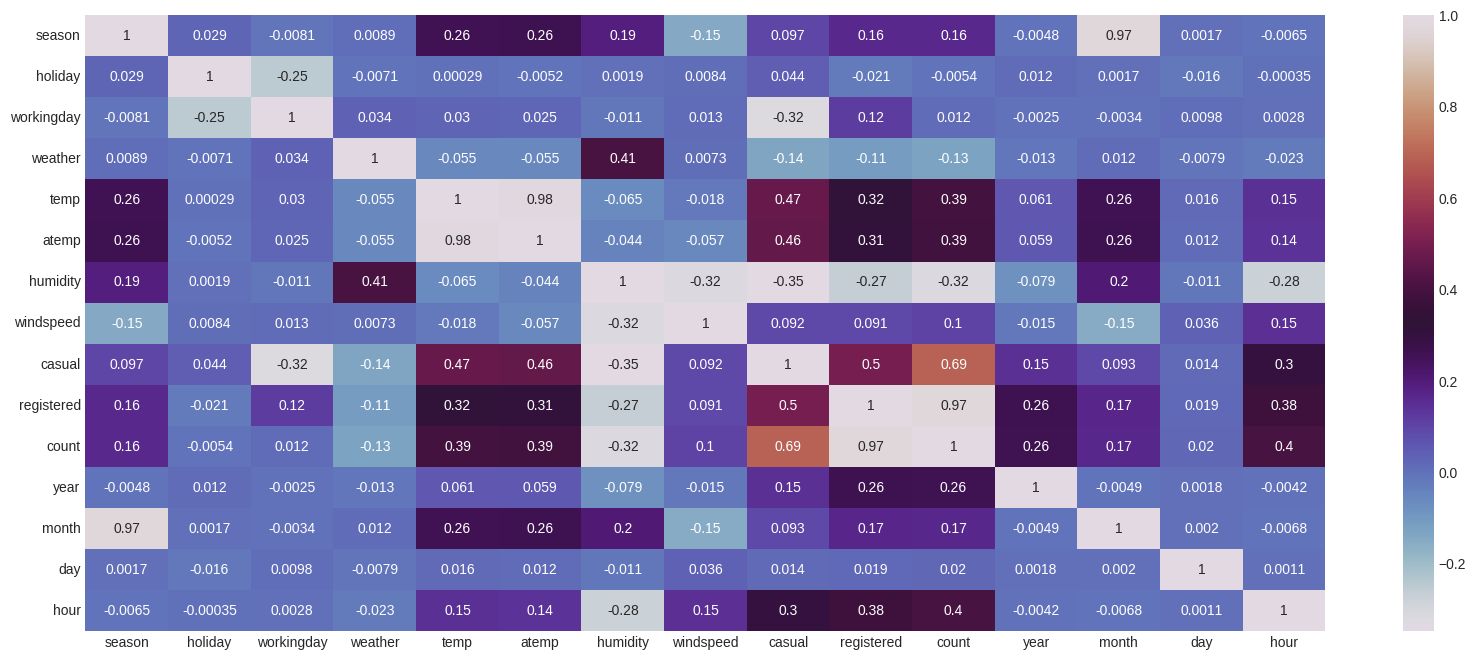

In [ ]:
#Correlations
plt.figure(figsize=(20,8))
sns.heatmap(df_copy.corr(), annot=True, cmap="twilight", xticklabels=1, yticklabels=1)
plt.show()

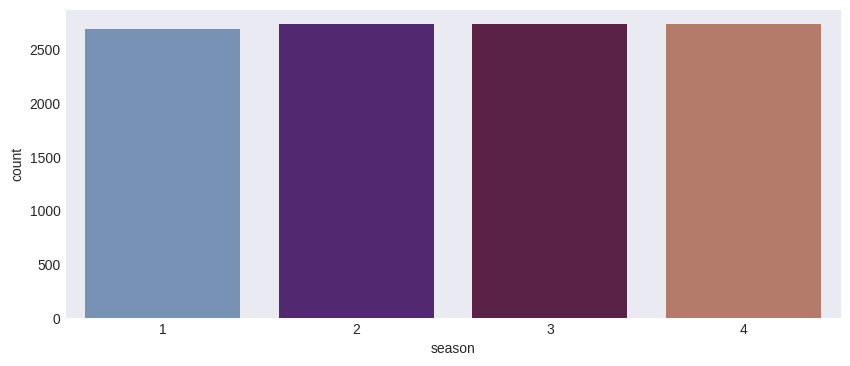

In [ ]:
#Univariate Analysis
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='season', palette="twilight")
plt.show()

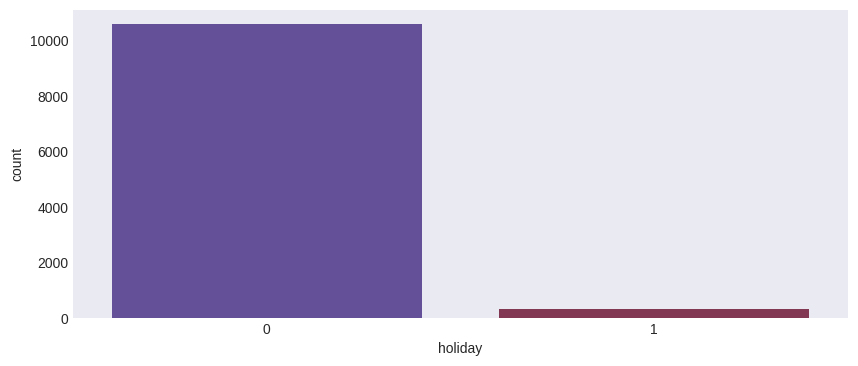

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='holiday', palette="twilight")
plt.show()

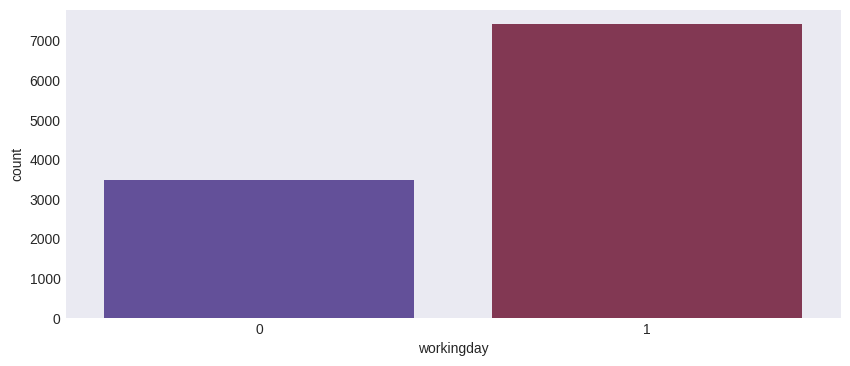

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='workingday', palette="twilight")
plt.show()

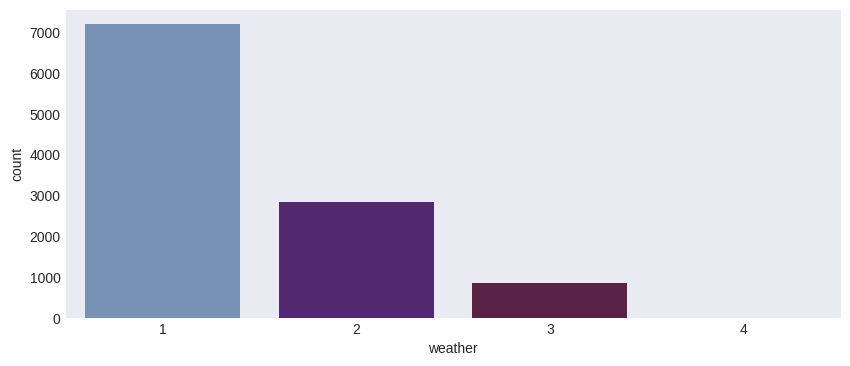

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='weather', palette="twilight")
plt.show()

<ipython-input-50-88ee37b78486>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='temp', palette="twilight", aspect=2, color="m")


<Figure size 1500x800 with 0 Axes>

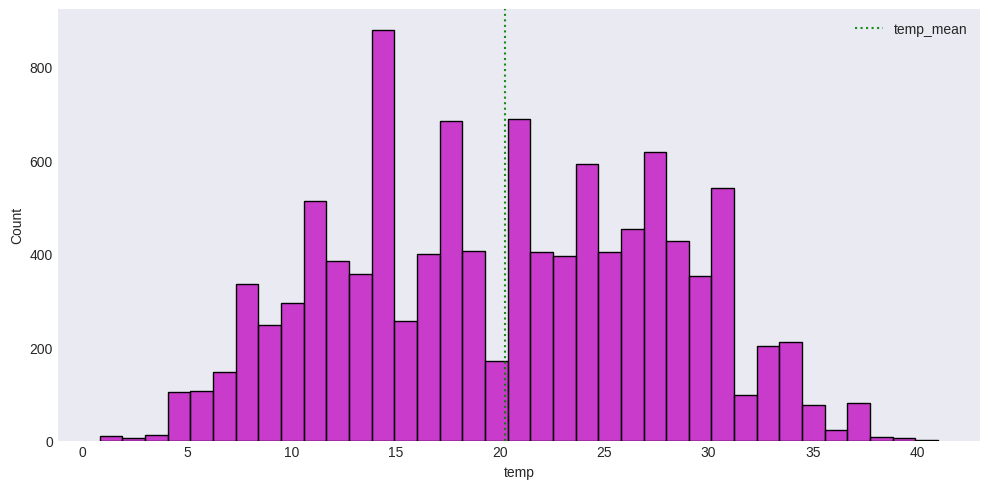

In [ ]:
plt.figure(figsize=(15,8))
sns.displot(data=df, x='temp', palette="twilight", aspect=2, color="m")
plt.axvline(x=df['temp'].mean(), linestyle=":", color='g', label="temp_mean", alpha=0.9)
plt.legend()
plt.show()

<ipython-input-51-37c3449fad55>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="hour", y="count", data=df_copy, palette="terrain")


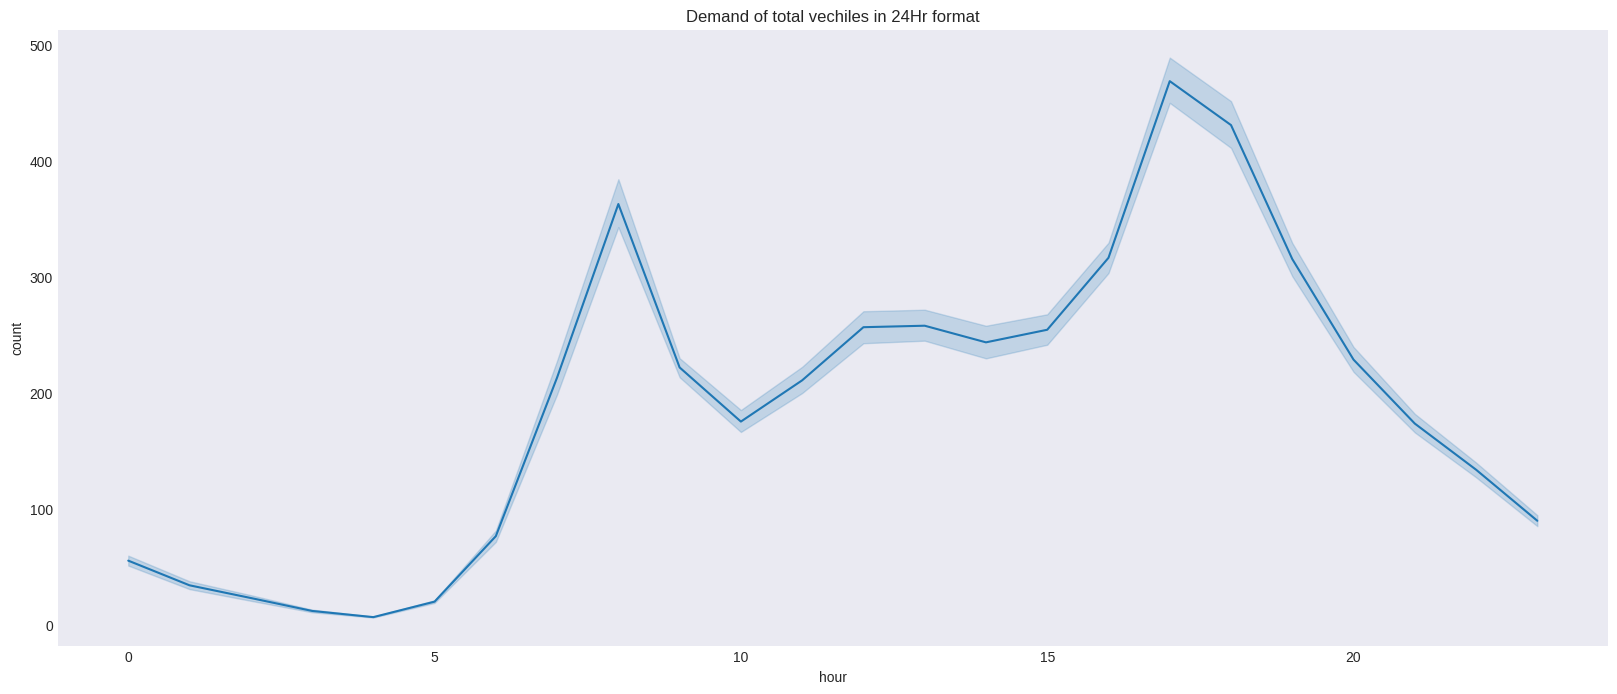

In [ ]:
#Bivariate Analysis
plt.figure(figsize=(20,8))
sns.lineplot(x="hour", y="count", data=df_copy, palette="terrain")
plt.title("Demand of total vechiles in 24Hr format")
plt.show()

# Observations
# The highest peak demand can be seen during the 17-19 hour period, followed by the peak from 7-9 hours.

<Figure size 2000x800 with 0 Axes>

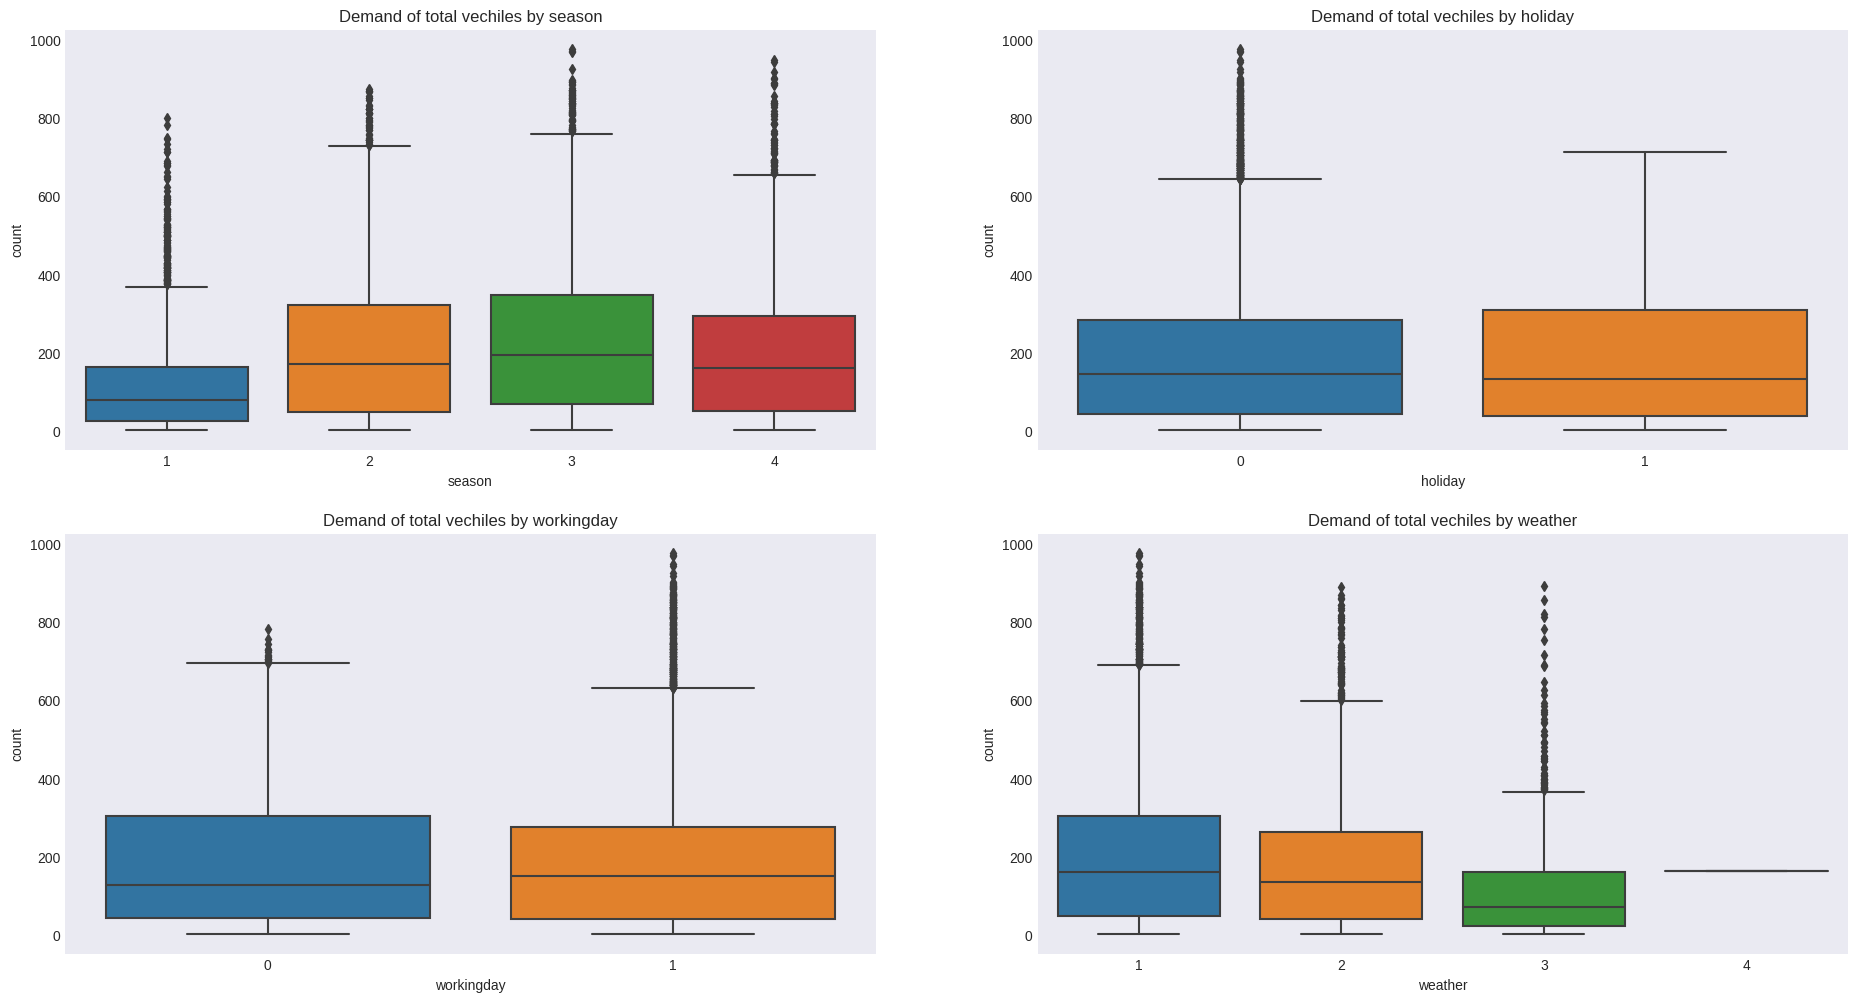

In [ ]:
plt.figure(figsize=(20,8))
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()
for index, column in enumerate(categorical_columns):
  sns.boxplot(data=df, x=column, y="count", ax=axes[index])
  axes[index].set_title(f"Demand of total vechiles by {column}", )

##Observations
###Season
The median demand in the summer, fall, and winter seasons is nearly identical, while the median is very low in the spring season.

The outliers in countable demand can be seen for all the seasons, probably lot of outliers in spring season. All the outliers are in the upper range of Inter Quartile Range (IQR).

###Holiday
The median counted demand is nearly identical during holidays and non-holidays.

There are no outliers in the counted demand for holidays, whereas there are outliers in the non-holiday demand, and that too, in the upper Inter Quartile Range (IQR).

###workingday
The median difference between a working day and a non-working day is only marginally significant.

There are outliers in vehicle demand on working and non-working days.

###Weather
For clear/few clouds and misty/cloudy conditions, the median demand for counted vehicles is nearly identical.

The demand for counted vehicles during light snow/light rain is less than during clear and mist conditions.

There is only one data point for heavy rain and thunder storms, which makes sense as nobody would prefer to ride in these heavy conditions.

There are outliers in the upper IQR for all the conditions, except heavy rain.

##Statistical Tests

###2 Sample T-Test
2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.

Null Hypothesis:  H0 :  workingday  =  non−workingday

Alternative Hypothesis:  Ha :  workingday  !=  non−workingday

In [53]:
from scipy.stats import ttest_ind

In [55]:
working_day_count = df[(df['workingday'] == 1)]['count']
non_working_day_count = df[(df['workingday'] == 0)]['count']

t_stat, p_value = np.round(ttest_ind(working_day_count, non_working_day_count, random_state=42), 2)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is 1.21 and p_value is 0.23


###Conclusion
This results in a p-value of 0.23, which is below the defined significance level of 5%. The T-test is therefore not significant and the NULL HYPOTHESIS is CONFIRMED.

##Analysis of Variance (ANOVA)
To check if No. of cycles rented is similar or different in different

1.Weather

2.Season

Null Hypothesis:  H0 :  spring  =  summer  =  fall  =  winter

Alternative Hypothesis:  Ha :  spring  !=  summer  !=  fall  !=  winter

In [56]:
from scipy.stats import f_oneway

In [57]:
# ANOVA for season
spring_season = df[df['season'] == 1]['count']
summer_season = df[df['season'] == 2]['count']
fall_season = df[df['season'] == 3]['count']
winter_season = df[df['season'] == 4]['count']

f_stat, p_value = f_oneway(spring_season, summer_season, fall_season, winter_season)
print(f"F-test statistic is {f_stat} and p_value is {p_value}")

F-test statistic is 236.94671081032106 and p_value is 6.164843386499654e-149


##χ2  Test

Note: An often quoted guideline for the validity of this calculation is that the test should be used only if the observed and expected frequencies in each cell are at least 5.

Null Hypothesis:  H0 : The impact of weather is independent of seasons.

Alternative Hypothesis:  Ha : The impact of weather has a different impact depending on the season.

In [58]:
from scipy.stats.contingency import chi2_contingency

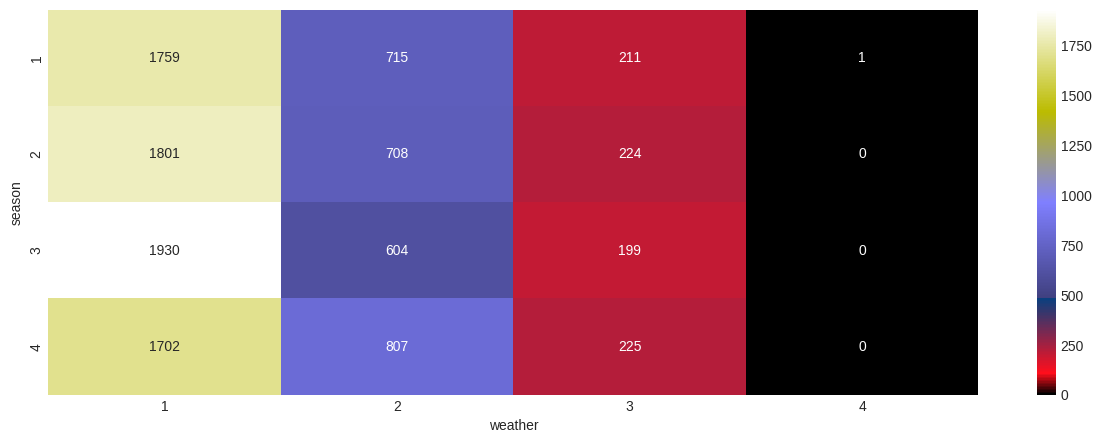

In [60]:
plt.figure(figsize=(15, 5))
contingency_table = pd.crosstab(df['season'], df['weather'])
values = np.array([contingency_table.iloc[0][:4], contingency_table.iloc[1][:4], contingency_table.iloc[2][:4]])
sns.heatmap(contingency_table, annot=True, fmt='.6g', cmap="gist_stern")
plt.show()

In [61]:
chi2_stat, p_value, dof, expected_values = chi2_contingency(values)
print(f"Chi2-test statistic is {chi2_stat} and p_value is {p_value}")

Chi2-test statistic is 23.02733254462982 and p_value is 0.0007873757080593115


###Conclusion

This results in a p-value of 0.0007873757080593115, which is below the defined significance level of 5%. The Chi2 test is therefore significant and the NULL HYPOTHESIS is NOT CONFIRMED.

###Insights
By performing a 2-sample T-test on working and non-working days with respect to count, we can infer that the population count means of both categories are the same.

By performing an ANOVA test on different seasons with respect to count, we can infer that population count means under different seasons are not the same, meaning there is a difference in the usage of Yulu bikes in different seasons.

By performing an ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are the same, meaning there is a difference in the usage of Yulu bikes in different weather conditions.

By performing a Chi2 test on season and weather (categorical variables), we can infer that there is an impact on weather dependent on season.

The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded at 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius.

The Yulu has a median of 145 counted (casual + registered) users, with 75% of users totaling 284. The average number of counted users is 191.574. The maximum number of counted users is 977.

68% of the data points are collected for the working day, which makes sense as a lot of people use public transportation on working days.

Very few data points are collected during light snow or light rain conditions; probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.

The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.

The maximum number of holidays can be seen during the fall and winter seasons.

In the year 2011, the average number of total users was 144, with a huge standard deviation of 133, a median of 111, and a maximum and minimum count of 638 and 1, respectively. In the year 2012, the average number of total users was 238.56, with a huge standard deviation of 208, a median of 199, and a maximum and minimum count of 977 and 1, respectively.

In October, the average number of total users was 228, with a standard deviation of 204, a median of 180, and a maximum and minimum count of 948 and 1, respectively.

There is a strong positive correlation between casual and count, and a very high correlation between registered and counted users.

The median difference between a working day and a non-working day is only marginally significant.

The total demand curve is increasing from clear skies to cloudy mist and is reduced in light snow or light rain.

##Recommendations
The counted vehicle demand on non-working and holiday days is very low. Yulu can introduce promotional offers on holidays and non-holidays or can arrange health competitions on Yulu Move bikes.

Because vehicle demand is low from January to June, Yulu can promote itself by offering a weekly or biweekly discount based on a certain amount of usage in that month.

Yulu can offer customised referral discounts based on the bikes they choose in their first trial (Yulu Miracle, Yulu Dex, Yulu Move).

The amount of bicycle usage during 0 to 8 hours is very low. Yulu can promote itself by allowing fitness enthusiasts to use Yulu Move during that period by rewarding them with exciting prizes.

During the spring season, the demand for vehicles is very low. Yulu can introduce discounted offers to promote more usage of bikes during spring.